In [5]:
# Load all environment variables from the azd deployment
import subprocess
from io import StringIO
from dotenv import load_dotenv
import os
result = subprocess.run("azd env get-values", stdout=subprocess.PIPE, cwd=os.getcwd())
load_dotenv(stream=StringIO(result.stdout.decode("utf-8")))

In [15]:
# https://learn.microsoft.com/azure/ai-services/openai/how-to/gpt-with-vision?tabs=python#call-the-chat-completion-apis

from openai import AzureOpenAI
from azure.identity import DefaultAzureCredential, get_bearer_token_provider
credential = DefaultAzureCredential()

token_provider = get_bearer_token_provider(DefaultAzureCredential(), "https://cognitiveservices.azure.com/.default")

deployment_name = os.getenv("AZURE_OPENAI_GPT4V_DEPLOYMENT")
client = AzureOpenAI(
    azure_ad_token_provider=token_provider,
    api_version="2023-12-01-preview",
    base_url = f'https://{os.getenv("AZURE_OPENAI_SERVICE")}.openai.azure.com/openai/deployments/{deployment_name}/extensions'
)

In [18]:
response = client.chat.completions.create(
  model=deployment_name,
  messages=[
    {
      "role": "user",
      "content": [
        {"type": "text", "text": "What’s in this image?"},
        {
          "type": "image_url",
          "image_url": {
            "url": "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg",
          },
        },
      ],
    }
  ],
  max_tokens=300,
)

print(response.choices[0].message.content)

The image shows a wooden boardwalk pathway through a green grassy field with trees and a blue sky with clouds in the background.


sunset_mountains.jpg


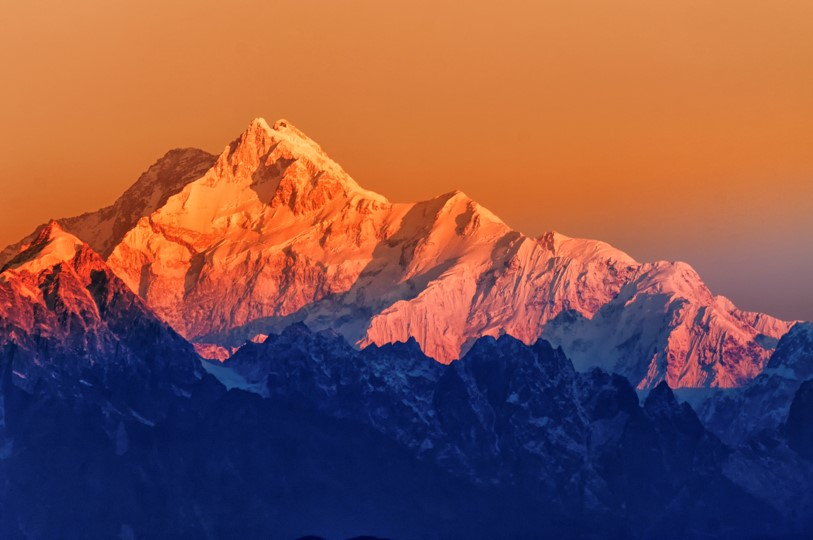

In [20]:
# Use a local image
import base64
from PIL import Image
from mimetypes import guess_type

# Function to encode a local image into data URL 
def local_image_to_data_url(image_path):
    # Guess the MIME type of the image based on the file extension
    mime_type, _ = guess_type(image_path)
    if mime_type is None:
        mime_type = 'application/octet-stream'  # Default MIME type if none is found

    # Read and encode the image file
    with open(image_path, "rb") as image_file:
        base64_encoded_data = base64.b64encode(image_file.read()).decode('utf-8')

    # Construct the data URL
    return f"data:{mime_type};base64,{base64_encoded_data}"

# Example usage
image_path = os.path.join("..", "pictures", "nature", "Picture33.jpg")
data_url = local_image_to_data_url(image_path)

response = client.chat.completions.create(
  model=deployment_name,
  messages=[
    {
      "role": "user",
      "content": [
        {"type": "text", "text": "Generate a file name for the image. Only include the file name and nothing else in the output"},
        {
          "type": "image_url",
          "image_url": {
            "url": data_url,
          },
        },
      ],
    }
  ],
  max_tokens=300,
)

print(response.choices[0].message.content)
with Image.open(image_path) as im:
  display(im)